# Project 4: Predicting outbreaks caused by West Nile Virus and using cost benefit analysis to help the City of Chicago.

Done by: Richelle-Joy Chia, Er Jie Yong, Meriky Lo 

Problem Statement: How can we help the City of Chicago Public Health Department accurately predict outbreaks and optimize measures to tackle financial burdens caused by WNV related diseases?

## Part 3: Cost Benefit Analysis

### Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spray = pd.read_csv('./assets/spray.csv')

In [5]:
spray['Date'] = pd.to_datetime(spray['Date'])

In [6]:
spray= spray.set_index('Date')

In [7]:
spray=spray.drop(columns=['Time'])

In [8]:
spray=spray.sort_index()

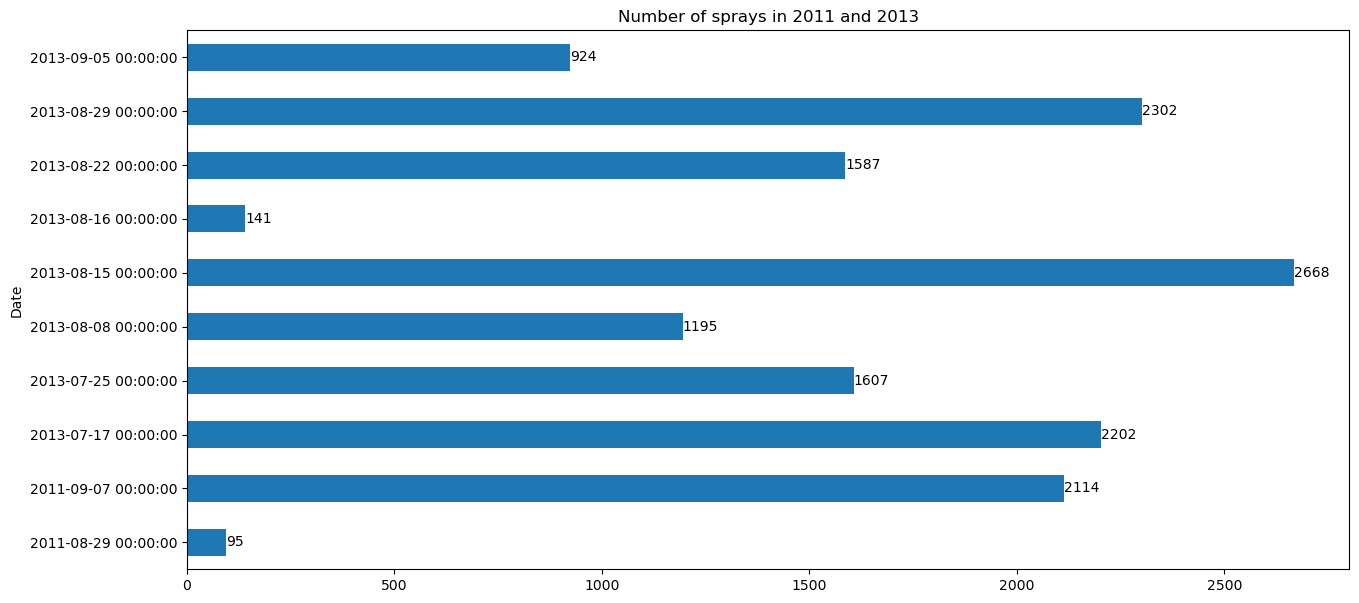

In [71]:
# draw a bar plot counting the number of sprays across the various dates (with count annotation)
sizes = spray.groupby(["Date"]).size()
sizes.plot(kind='barh',figsize=(15,7),title="Number of sprays in 2011 and 2013")

for y, x in enumerate(sizes):
    plt.annotate(str(x), xy=(x, y), va='center')

In [9]:
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")

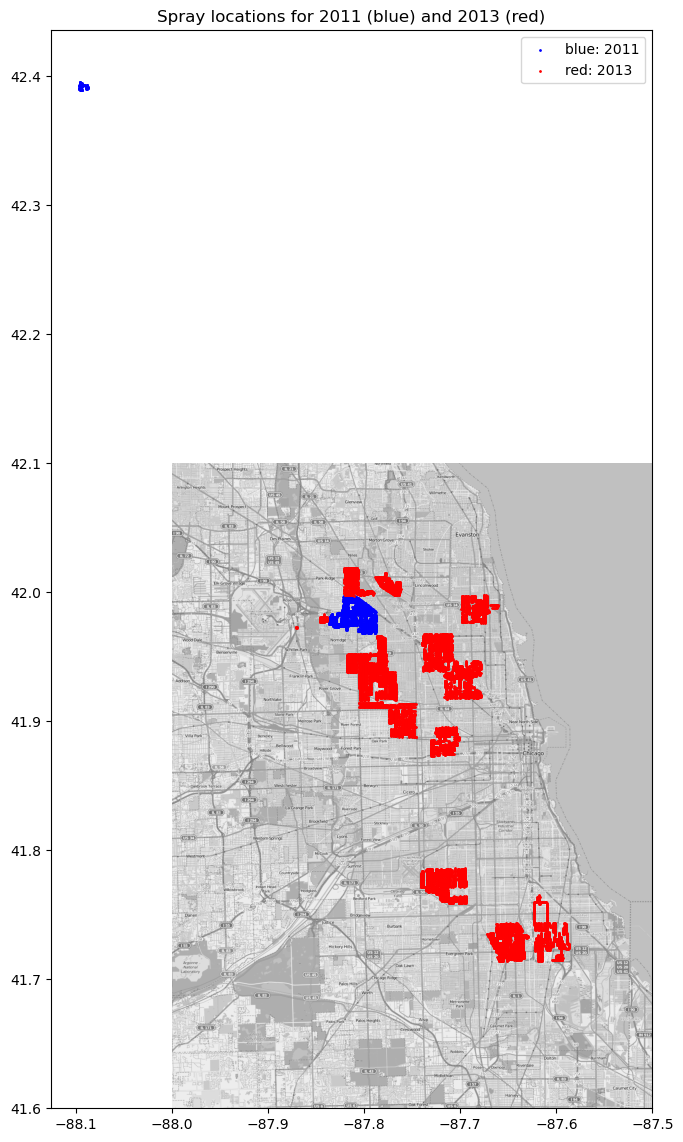

In [10]:
#plot locations of sprays
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

spray_2011 = spray.loc["2011"]
spray_2013 = spray.loc["2013"]

sp_2011 = plt.scatter(spray_2011['Longitude'], spray_2011['Latitude'], c="blue", marker='o', s=1, alpha=1)
sp_2013 = plt.scatter(spray_2013['Longitude'], spray_2013['Latitude'], c="red", marker='o', s=1, alpha=1)

plt.title("Spray locations for 2011 (blue) and 2013 (red)", fontsize=12)
plt.legend((sp_2011, sp_2013), ("blue: 2011", "red: 2013"))
plt.show();

There is an outlier: spraying recorded outside Chicago area.

In [10]:
spray = spray.loc[spray["Latitude"] < 42.1]
spray.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14740 entries, 2011-09-07 to 2013-09-05
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   14740 non-null  float64
 1   Longitude  14740 non-null  float64
dtypes: float64(2)
memory usage: 345.5 KB


In [11]:
spray_sep2011=spray.loc['2011-09']

In [12]:
spray_jul2013=spray.loc['2013-07']
spray_aug2013=spray.loc['2013-08']
spray_sep2013=spray.loc['2013-09']

### Now let's look at the data from df combined

In [13]:
df_combined=pd.read_csv('./assets/df_combined.csv')

In [14]:
df_combined['Date']=pd.to_datetime(df_combined['Date'])
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   New_ID        8610 non-null   int64         
 1   Date          8610 non-null   datetime64[ns]
 2   Week          8610 non-null   int64         
 3   Month         8610 non-null   int64         
 4   Year          8610 non-null   int64         
 5   Species       8610 non-null   object        
 6   Trap          8610 non-null   object        
 7   Latitude      8610 non-null   float64       
 8   Longitude     8610 non-null   float64       
 9   WnvPresent    8610 non-null   int64         
 10  NumMosquitos  8610 non-null   int64         
 11  species_no    8610 non-null   float64       
 12  Station       8610 non-null   int64         
 13  Tmax          8610 non-null   int64         
 14  Tmin          8610 non-null   int64         
 15  Tavg          8610 non-null   int64   

In [15]:
df_date=df_combined.set_index('Date')

In [16]:
df_date.sort_index(inplace=True)

In [17]:
df_jul2011=df_date.loc['2011-07']

In [18]:
df_aug2011=df_date.loc['2011-08']

In [19]:
df_sep2011=df_date.loc['2011-09']

In [20]:
df_jul2013=df_date.loc['2013-07']
df_aug2013=df_date.loc['2013-08']
df_sep2013=df_date.loc['2013-09']

### Plotting locations where mosquitos were found and spray locations for the months of July, August, September for years 2011 and 2013

Mosquitos and spray locations for July 2011

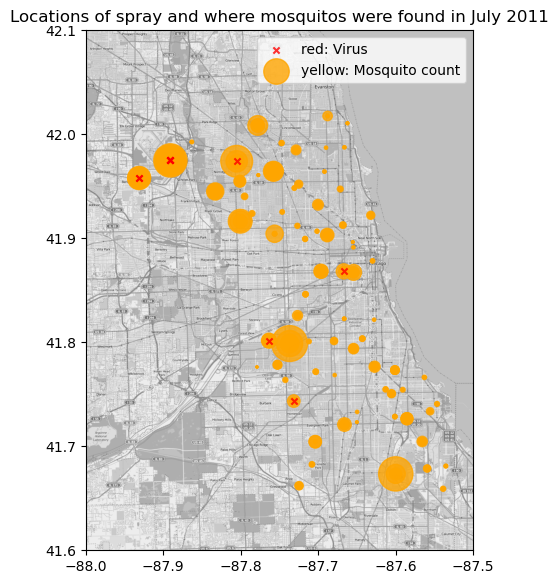

In [28]:
# plot locations where mosquitos were found and spray locations for Jul2011
# no spraying were recorded on july 2011

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_jul2011.loc[df_jul2011['NumMosquitos']>0]
wnv_yes = df_jul2011.loc[df_jul2011["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_jul2011['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=20, alpha=0.8)

plt.title("Locations of spray and where mosquitos were found in July 2011", fontsize=12)
plt.legend((mos_with_virus, mos),("red: Virus", "yellow: Mosquito count"))

Mosquitos and spray locations for August 2011

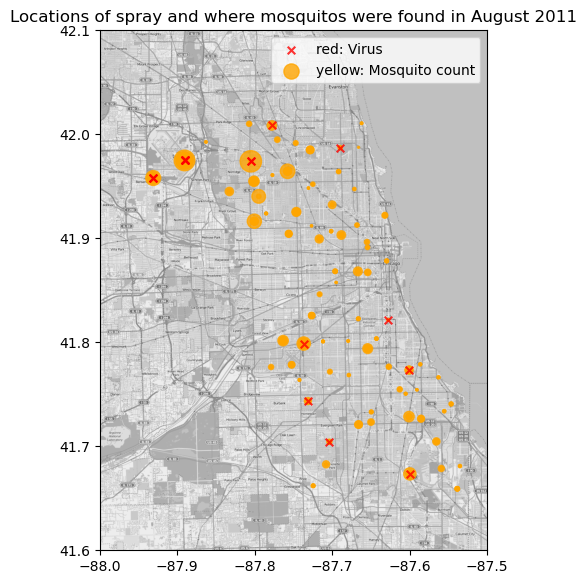

In [29]:
# plot locations where mosquitos were found and spray locations for Aug2011
# spray locations in Aug 2011 were outside Chicago area, thus no record of spraying done inside Chicago area

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_aug2011.loc[df_aug2011['NumMosquitos']>0]
wnv_yes = df_aug2011.loc[df_aug2011["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_aug2011['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=30, alpha=0.8)

plt.title("Locations of spray and where mosquitos were found in August 2011", fontsize=12)
plt.legend((mos_with_virus, mos),("red: Virus", "yellow: Mosquito count"))

Mosquitos and spray locations for Sep 2011

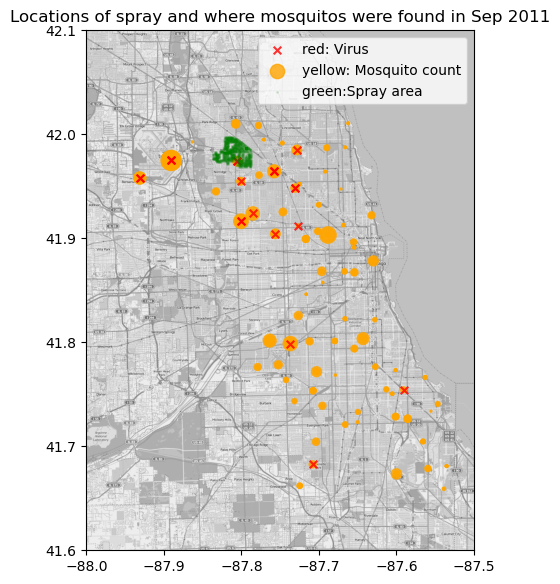

In [30]:
# plot locations where mosquitos were found and spray locations for sep2011

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_sep2011.loc[df_sep2011['NumMosquitos']>0]
wnv_yes = df_sep2011.loc[df_sep2011["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_sep2011['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=30, alpha=0.8)
spray = plt.scatter(spray_sep2011['Longitude'], spray_sep2011['Latitude'], c='green', marker='o', s=1, alpha=0.1)

plt.title("Locations of spray and where mosquitos were found in Sep 2011", fontsize=12)
plt.legend((mos_with_virus, mos, spray),("red: Virus", "yellow: Mosquito count",'green:Spray area'))

Mosquitos and spray locations for Jul 2013

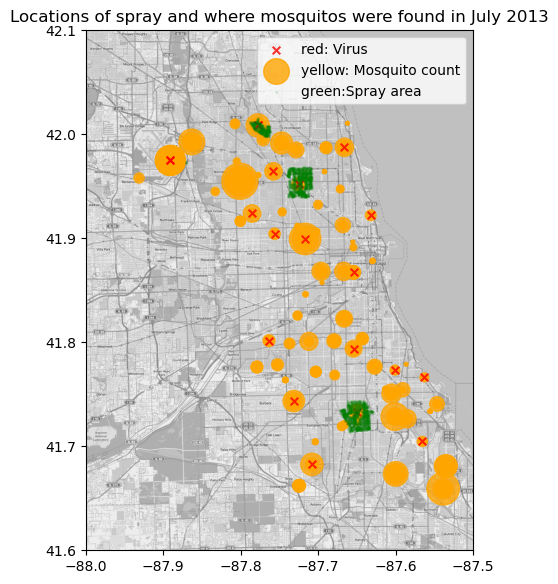

In [31]:
# plot locations where mosquitos were found and spray locations for Jul 2013

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_jul2013.loc[df_jul2013['NumMosquitos']>0]
wnv_yes = df_jul2013.loc[df_jul2013["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_jul2013['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=30, alpha=0.8)
spray = plt.scatter(spray_jul2013['Longitude'], spray_jul2013['Latitude'], c='green', marker='o', s=1, alpha=0.1)

plt.title("Locations of spray and where mosquitos were found in July 2013", fontsize=12)
plt.legend((mos_with_virus, mos, spray),("red: Virus", "yellow: Mosquito count",'green:Spray area'))

Mosquitos and spray locations for Aug 2013

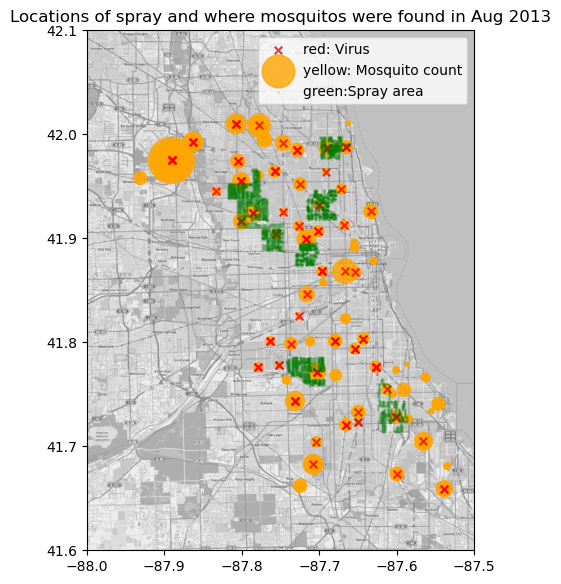

In [33]:
# plot locations where mosquitos were found and spray locations for aug 2013

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_aug2013.loc[df_aug2013['NumMosquitos']>0]
wnv_yes = df_aug2013.loc[df_aug2013["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_aug2013['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=30, alpha=0.8)
spray = plt.scatter(spray_aug2013['Longitude'], spray_aug2013['Latitude'], c='green', marker='o', s=1, alpha=0.1)

plt.title("Locations of spray and where mosquitos were found in Aug 2013", fontsize=12)
plt.legend((mos_with_virus, mos, spray),("red: Virus", "yellow: Mosquito count",'green:Spray area'))

Mosquitos and spray locations for Sep 2013

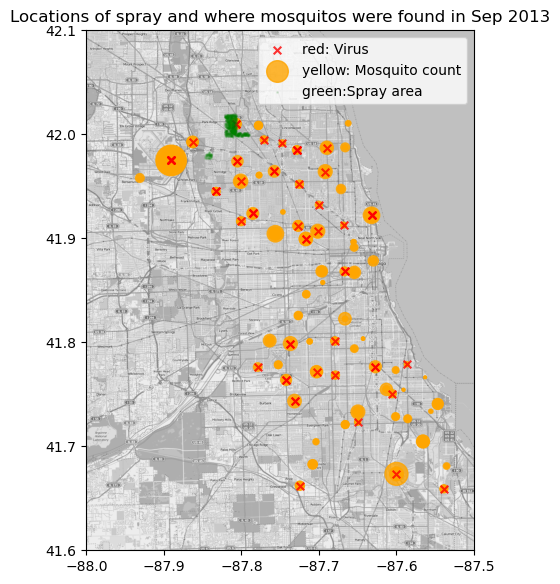

In [34]:
# plot locations where mosquitos were found and spray locations for sep2013

plt.figure(figsize=(5,7))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

num_mos = df_sep2013.loc[df_sep2013['NumMosquitos']>0]
wnv_yes = df_sep2013.loc[df_sep2013["WnvPresent"]==1]

mos = plt.scatter(num_mos['Longitude'], num_mos['Latitude'], c="orange", marker='o', s=df_sep2013['NumMosquitos']*2, alpha=0.8)
mos_with_virus = plt.scatter(wnv_yes['Longitude'], wnv_yes['Latitude'], c="red", marker='x', s=30, alpha=0.8)
spray = plt.scatter(spray_sep2013['Longitude'], spray_sep2013['Latitude'], c='green', marker='o', s=1, alpha=0.1)

plt.title("Locations of spray and where mosquitos were found in Sep 2013", fontsize=12)
plt.legend((mos_with_virus, mos, spray),("red: Virus", "yellow: Mosquito count",'green:Spray area'))

### Cost benefit analysis

The above plots show that spraying typically took place in August and September, while West Nile virus outbreaks start in June and July.
This means that spraying does not help much to prevent west nile virus outbreaks when it peaks in the summer months. 
Ineffective preventions can result in high cases of west nile virus related diseases which in turn increase costs of medical treatments and lost of productivity.

According to National Library of Medicine report (see Table 2 in this [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)), estimated average medical cost for one single case of WNV disease is $33,143. In the whole USA, total mean cost of WNV hospitalized cases and deaths is approximately $56 million per year (see [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/)). These are big sums and cost to human wellness that can be saved through targeted prevention measures such as insecticide spraying.

Between 2003 and 2012, the city of Chicago sees an average of 17 cases per year (see [Link](https://www.chicago.gov/content/dam/city/depts/cdph/statistics_and_reports/CDInfo_2013_JULY_WNV.pdf)). 
This means that total cost per year based on this average = 17 x $ 33,143 = $ 563,431.

Informed by our predictions, targetted spraying effort can be deployed to reduce medical costs and cost of productivity lost. In turn, these funds can be directed to cover virus prevention measures which include pesticide spraying.

The most commonly used pesticide in Chicago city is Zenifex E4 (see [Link](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)).

The cost of Zenivex E4 is $78.85 per gallon or $0.92 per acre ([Link](http://www.centralmosquitocontrol.com/-/media/files/centralmosquitocontrol-na/us/resources-lit%20files/2015%20zenivex%20pricing%20brochure.pdf))

The area of Chicago city is 150,000 acres.

With this information, the cost of spraying can calculated following two scenarios:
(i) spraying the whole Chicago city 
(ii) targeted spray only on locations where virus presence is predicted

#### (i) cost benefit analysis if spraying the whole city

In [1]:
cost = 0.92 * 150000
cost

138000.0

Typically, the efficacy of mosquito spraying lasts for 30 days (see [Link](https://www.callnorthwest.com/2019/05/how-long-does-a-mosquito-treatment-last/)).
Based on past data, outbreaks typically peaks in August, we would recommend spraying to start in July.
With that in mind, spraying the whole Chicago city in July, Aug, and Sep will cost 3 x $138,000 or $ 414,000.

This means that costs saved from medical treatment can be calculated as follow:


In [6]:
cost_saved_per_year = 563434- 414000
print(f'Cost_saved_per_year is ${cost_saved_per_year}')
print(f'Percentage saving {(round(149434*100/563434))}%')

Cost_saved_per_year is $149434
Percentage saving 27%


#### (ii) cost benefit analysis with targeted spraying based on prediction (2014)

In [4]:
# import predicted data for 2014 from July to October
data_201407=pd.read_csv('./tableau/data_201407.csv')
data_201408=pd.read_csv('./tableau/data_201408.csv')
data_201409=pd.read_csv('./tableau/data_201409.csv')
data_201410=pd.read_csv('./tableau/data_201410.csv')

Find out how many traps are predicted to have virus presence for each month

In [7]:
data_201407.loc[data_201407['WnvPresent']==1,:]

,Unnamed: 0,Year,Month,Trap,Latitude,Longitude,WnvPresent
70,1946,2014,7,T095,41.704336,-87.703736,1
79,1955,2014,7,T115,41.673408,-87.599862,1
132,2008,2014,7,T900,41.974689,-87.890615,1
133,2009,2014,7,T903,41.957799,-87.930995,1


In [8]:
data_201408.loc[data_201408['WnvPresent']==1,:]

,Unnamed: 0,Year,Month,Trap,Latitude,Longitude,WnvPresent
0,2010,2014,8,T001,41.953705,-87.733974,1
1,2011,2014,8,T002,41.954690,-87.800991,1
2,2012,2014,8,T003,41.964242,-87.757639,1
3,2013,2014,8,T004,41.962728,-87.748367,1
4,2014,2014,8,T006,41.990284,-87.797127,1
...,...,...,...,...,...,...,...
129,2139,2014,8,T236,41.994679,-87.770899,1
130,2140,2014,8,T237,41.738903,-87.695443,1
131,2141,2014,8,T238,41.753391,-87.707394,1
132,2142,2014,8,T900,41.974689,-87.890615,1


In [9]:
data_201409.loc[data_201409['WnvPresent']==1,:]

,Unnamed: 0,Year,Month,Trap,Latitude,Longitude,WnvPresent
0,2144,2014,9,T001,41.953705,-87.733974,1
1,2145,2014,9,T002,41.954690,-87.800991,1
2,2146,2014,9,T003,41.964242,-87.757639,1
3,2147,2014,9,T004,41.962728,-87.748367,1
4,2148,2014,9,T006,41.990284,-87.797127,1
...,...,...,...,...,...,...,...
129,2273,2014,9,T236,41.994679,-87.770899,1
130,2274,2014,9,T237,41.738903,-87.695443,1
131,2275,2014,9,T238,41.753391,-87.707394,1
132,2276,2014,9,T900,41.974689,-87.890615,1


In [10]:
data_201410.loc[data_201410['WnvPresent']==1,:]

,Unnamed: 0,Year,Month,Trap,Latitude,Longitude,WnvPresent
1,2279,2014,10,T002,41.954690,-87.800991,1
6,2284,2014,10,T008,42.008314,-87.777921,1
8,2286,2014,10,T011,41.944869,-87.832763,1
47,2325,2014,10,T070,41.797616,-87.797894,1
59,2337,2014,10,T082,41.803423,-87.642984,1
63,2341,2014,10,T086,41.688324,-87.676709,1
66,2344,2014,10,T090,41.868077,-87.666901,1
70,2348,2014,10,T095,41.704336,-87.703736,1
71,2349,2014,10,T096,41.731922,-87.677512,1
78,2356,2014,10,T114,41.798697,-87.736812,1


In [ ]:
Our prediction of virus presence for the month of:<br>
July : 4 traps<br>
August : 123 traps <br>
September : 97 traps <br>
October : 19 traps <br>

Virus presence peaked in August and the numbers remain high for September and OCtober while July cases is rather low.<br>
Based on this prediction, we would recommend pesticide spraying to take place in August, September, and October. 

In [13]:
# calculate approximate area per trap (total area of Chicago divided by total number of traps)
area_per_trap = 150000/134
round(area_per_trap)

1119

In [1]:
# targeted spray only on traps where virus is predicted to be present
# For July, spray on 4 traps, for August, spray on 123 traps, Sep: 97 traps, Oct : 19 traps. Spraying costs are calculated as:
print(f'Cost of pesticide in July: ${round(4*1119*0.92)}')
print(f'Cost of pesticide in Aug: ${round(123*1119*0.92)}')
print(f'Cost of pesticide in Sep: ${round(97*1119*0.92)}')
print(f'Cost of pesticide in Oct: ${round(19*1119*0.92)}')

Cost of pesticide in July: $4118
Cost of pesticide in Aug: $126626
Cost of pesticide in Sep: $99860
Cost of pesticide in Oct: $19560


In [2]:
print(f'Total pesticide cost for 2014 is ${4118+126626+99860+19560}')

Total pesticide cost for 2014 is $250164


In [4]:
cost_saved_per_year = 563434- 250164
print(f'Cost_saved_per_year is ${cost_saved_per_year}')
print(f'Percentage saving {(round(313270*100/563434))}%')

Cost_saved_per_year is $313270
Percentage saving 56%


Summary: Compared to the previous calculation, targeted spraying gives more cost benefits.<br>

## Limitations of our cost benefit analysis
However, these cost benefit calculations comes with a few limitations. Firstly, our analysis did not take into account the costs of manpower for spraying, which may be a hefty sum. Secondly, we assumed that the effectiveness of pesticides is 100%, but this may not be true. Next, we did not account for possible costs that may arrise from lost of productivity due to serious complications and deaths. Finally, human's health cannot be quantified with a price and there may be more than just moeny involved. 

## Conclusion
Overall, from our models, we learned that the most important features are location and date. We have also observed from past data that current spraying is not optimum in reducing number of mosquitoes / virus. This is because the spraying took place after virus was found, and spraying locations do not cover most virus outbreak areas.

## Recommendations
We would also like to provide a few recommendations. First, we would recommend targeted spraying on specific dates (before mosquitoes were found) and specific locations based on our model predictions. Next, it would be useful to identify more effective pesticides to ensure that we are not wasting resources. Finally, we recommend that the city of Chicago can deploy other preventive measures such as spraying on high risk areas and public education.

## Next Steps

In future, before spending resources on spraying around the city, it is critical to first predict outbreaks based on timeframe and location, predict number of mosquitos present, and to do more feature engineering/EDA to identify higher correlated features. 
    